<a href="https://colab.research.google.com/github/pratyenggodip/MachineLearningTask/blob/main/TugasWeek2/Polynomial_Regression_EconomicOfScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nama : Pratyenggo Damar Iswara Putra
*   NIM  : 1103194141
*   Tugas 2


In [8]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Connect google collab with google drive
from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd
# File path in Google Drive
file_path = '/content/drive/MyDrive/DATASET/EconomiesOfScale.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


Mean Squared Error: 33.22656710889016


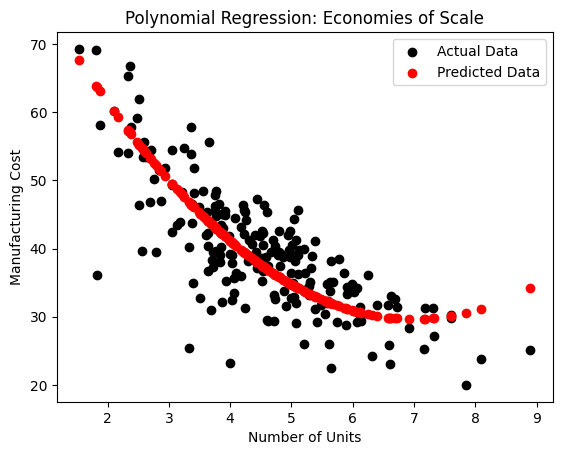

In [11]:
# Memilih fitur dan target dari dataset
X = df[["Number of Units"]]  # Kolom label (fitur)
y = df["Manufacturing Cost"]  # Kolom target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menerapkan Polynomial Regression
degree = 2  # Gantilah derajat polynomial sesuai kebutuhan
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Melatih model regresi linear dengan fitur polynomial
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test_poly)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot hasil
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Polynomial Regression: Economies of Scale')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.show()
